In [ ]:
#!pip install import_ipynb

In [ ]:
import warnings
warnings.filterwarnings('ignore')

# import import_ipynb
# from Preprocessing_05 import data, X, df_labels, X_train_lowcorr, X_test_lowcorr, Y_train, Y_test

#import error 뜬다면 !pip uninstall scipy, !pip install scipy==1.1.0

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

In [ ]:
df = pd.read_csv('preprocessed(MinMax).csv')
df

,age,campaign,day,previous,0,1,2,4,6,8,...,12,14,16,job_0,job_1,job_2,job_3,month_1,month_3,y
0,0.337662,0.000000,0.800000,0.000000,-0.313533,1.394495,0.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0,1,0,0,0,0,0
1,0.311688,0.081633,0.500000,0.000000,-0.215817,0.633028,0.000000,1.0,0.0,0.0,...,0.0,0.0,0.0,0,0,1,1,0,1,0
2,0.480519,0.020408,0.333333,0.000000,-0.219332,0.206422,0.000000,1.0,0.0,1.0,...,0.0,0.0,0.0,0,0,0,1,0,0,0
3,0.246753,0.061224,0.733333,0.000000,0.075923,0.100917,0.000000,1.0,0.0,0.0,...,1.0,1.0,0.0,0,1,0,1,0,1,0
4,0.207792,0.000000,0.266667,0.003636,-0.024605,0.417431,29.454545,1.0,0.0,0.0,...,1.0,1.0,0.0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30902,0.714286,0.000000,0.533333,0.029091,1.671002,0.545872,3.727273,1.0,0.0,0.0,...,0.0,0.0,0.0,1,0,0,1,1,0,1
30903,0.090909,0.020408,0.533333,0.000000,0.022496,0.940367,0.000000,0.0,0.0,0.0,...,0.0,1.0,0.0,0,0,1,1,1,0,1
30904,0.428571,0.040816,0.533333,0.000000,0.247452,3.651376,0.000000,1.0,0.0,1.0,...,0.0,0.0,0.0,0,0,1,1,1,0,1
30905,0.688312,0.020408,0.533333,0.000000,0.882953,1.261468,0.000000,0.0,1.0,0.0,...,0.0,0.0,0.0,1,0,0,1,1,0,1


In [ ]:
# 정상/이상 구분
normal = df.loc[df['y'] == 0]
anomaly = df.loc[df['y'] == 1]

# 행 shuffle 후 위에서 4513개 --> test
normal_shuffled=normal.sample(frac=1, random_state=3).reset_index(drop=True) #shuffling
normal_shuffled_test = normal_shuffled[:4513]
normal_shuffled_train = normal_shuffled[4513:]

# train에 쓰이는 정상 데이터 X, Y 구분
X_train = normal_shuffled_train[normal_shuffled_train.columns.difference(['y'])]
Y_train = normal_shuffled_train["y"]

# test에 쓰이는 정상 데이터 X, Y 구분 (샘플링)
X_normal_shuffled_test = normal_shuffled_test[normal_shuffled_test.columns.difference(['y'])]
Y_normal_shuffled_test = normal_shuffled_test["y"]

# test에 쓰이는 이상 데이터 X, Y 구분
X_anomaly = anomaly[anomaly.columns.difference(['y'])]
y_anomaly = anomaly["y"]

X_test = pd.concat([X_normal_shuffled_test, X_anomaly])
Y_test = pd.concat([Y_normal_shuffled_test, y_anomaly])

X_train.columns

Index(['0', '1', '10', '12', '14', '16', '2', '4', '6', '8', 'age', 'campaign',
       'day', 'job_0', 'job_1', 'job_2', 'job_3', 'month_1', 'month_3',
       'previous'],
      dtype='object')

In [ ]:
trainset = pd.concat([X_train,Y_train],axis = 1)
testset = pd.concat([X_test,Y_test],axis = 1)
X_pr = pd.concat([X_train, X_test],axis=0)
dataset = pd.concat([trainset,testset],axis = 0)

Normal = dataset.loc[dataset['y'] == 0]
Anomaly = dataset.loc[dataset['y'] == 1]

# AutoEncoder

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
X_train.shape

(21881, 20)

input과 hidden layer shape

In [ ]:
input_dim = 20 # 변수 개수

# Encoder structure
encoder1_dim = 400
encoder2_dim = 400

latent_dim = 40

# Decoder structure
decoder1_dim = 400
decoder2_dim = 400

In [ ]:
(input_dim, )

(20,)

## train 기반 모델 적합

- `hidden_layer_sizes`: 뉴런넷 hidden layer의 사이즈를 tuple로 받으며, 순차적으로 연결됨
- `activation`: non-linear activation 사용
- `learninig_rate_init`: 초기 학습률
- `max_iter`: 학습 반복수
- `tol`: stop 기준
- `verbose`: 학습 log 출력

In [ ]:
ae = MLPRegressor(hidden_layer_sizes = (encoder1_dim, encoder2_dim, latent_dim, decoder1_dim, decoder2_dim), 
                   activation = 'tanh', 
                   solver = 'adam', 
                   learning_rate_init = 0.01, 
                   max_iter = 100, 
                   tol = 0.0001, # 학습 개선도가 이만큼 되지 않으면 중단한다는 뜻 
                   verbose = True)

In [ ]:
ae.fit(X_train, X_train) #input과 output이 같도록

Iteration 1, loss = 0.70487493
Iteration 2, loss = 0.14308984
Iteration 3, loss = 0.14564275
Iteration 4, loss = 0.13663662
Iteration 5, loss = 0.31420761
Iteration 6, loss = 0.19724666
Iteration 7, loss = 0.16652478
Iteration 8, loss = 0.17584914
Iteration 9, loss = 0.18689828
Iteration 10, loss = 0.16333125
Iteration 11, loss = 0.18864562
Iteration 12, loss = 0.22170723
Iteration 13, loss = 0.18286543
Iteration 14, loss = 0.19720754
Iteration 15, loss = 0.23171609
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


MLPRegressor(activation='tanh', hidden_layer_sizes=(400, 400, 40, 400, 400),
             learning_rate_init=0.01, max_iter=100, verbose=True)

## 추정된 분포로 train & test 데이터 novelty score 생성

In [ ]:
def score(model,X):
    scores_ = np.square((X.values-ae.predict(X))).mean(axis=1)
    return scores_

#ae.predict(X): 복원된 X

In [ ]:
ae_train = score(ae, X_train)
ae_test = score(ae, X_test)

### train/test 데이터의 novelty score 분포 시각화

Text(0.5, 1.0, 'Test Data')

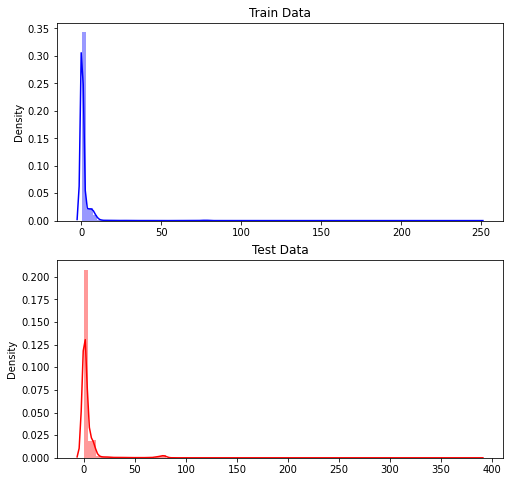

In [ ]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize = (8, 8))

sns.distplot(ae_train, bins=100, kde=True, color='blue', ax=ax1)
sns.distplot(ae_test, bins=100, kde=True, color='red', ax=ax2)
ax1.set_title("Train Data")
ax2.set_title("Test Data")

## threshold

### best f1 score 방식

In [ ]:
# score의 min ~ max 범위를 num_step개로 균등 분할한 threshold에 대하여 best threshold 탐색 
def search_best_threshold(score, y_true, num_step):
    best_f1 = 0.5
    best_threshold = None
    for threshold in np.linspace(min(score), max(score), num_step):
        y_pred = threshold < score

        f1 = f1_score(y_true, y_pred)
        if f1 > best_f1:
            best_f1 = f1
            best_threshold = threshold

    print('Best threshold: ', round(best_threshold, 4))
    print('Best F1 Score:', round(best_f1, 4))
    return best_threshold

In [ ]:
# best threshold 도출
ae_best_threshold = search_best_threshold(ae_test, Y_test, num_step=1000)

Best threshold:  0.1026
Best F1 Score: 0.6666


### best threshold 기반 모델 평가

In [ ]:
ae_scores = pd.DataFrame()
ae_scores['score'] = list(np.hstack([ae_train, ae_test]))
ae_scores['anomaly'] = ae_best_threshold < ae_scores['score'] #true 값일 거고 threshold > score 이면 false
ae_scores['anomaly'] = ae_scores['anomaly'].replace({True: 1, False: 0})
ae_scores

,score,anomaly
0,0.261480,1
1,6.307951,1
2,0.383495,1
3,0.269338,1
4,0.285741,1
...,...,...
30902,1.275465,1
30903,0.268893,1
30904,0.816414,1
30905,0.293547,1


In [ ]:
ae_scores['score'].describe()

count    30907.000000
mean         2.544413
std          9.563040
min          0.089934
25%          0.240249
50%          0.309152
75%          1.077453
max        384.247625
Name: score, dtype: float64

In [ ]:
ae_scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30907 entries, 0 to 30906
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   score    30907 non-null  float64
 1   anomaly  30907 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 483.0 KB


In [ ]:
ae_scores.loc[ae_scores['anomaly'] == 0]

,score,anomaly
8053,0.089934,0
11591,0.100902,0
27917,0.102570,0


In [ ]:
len(ae_scores.loc[ae_scores['anomaly'] == 0])

3

### FRR, FAR, F1 score 도출

In [ ]:
def calculate_metric(y_true, y_pred):
    cm = confusion_matrix(y_true, y_pred, labels=[1, 0])
    tp, fn, fp, tn = cm.ravel()
    
    frr = fp / (fp + tn)
    far = fn / (fn + tp) 
    
    f1 = f1_score(y_true, y_pred)

    sns.heatmap(pd.DataFrame(cm, columns = ['Predicted', 'Actual']),
            xticklabels=['Abnormal [1]', 'Normal [0]'], 
            yticklabels=['Abnormal [1]', 'Normal [0]'], 
            annot=True, fmt="d", linewidths=.5, cmap="YlGnBu")
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    
    return frr, far, f1

**  FRR: 1.0  |  FAR: 0.0002  |  F1 Score: 0.6666


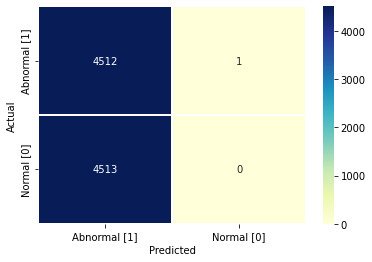

In [ ]:
# test 평가
frr, far, f1 = calculate_metric(Y_test, ae_scores['anomaly'].iloc[len(ae_train):])

print("**  FRR: {}  |  FAR: {}  |  F1 Score: {}".format(round(frr, 4), round(far, 4), round(f1, 4)))

**  FRR: 0.9999  |  FAR: nan  |  F1 Score: 0.0


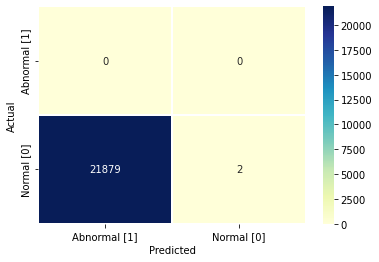

In [ ]:
# train 평가
frr, far, f1 = calculate_metric(Y_train, ae_scores['anomaly'].iloc[:len(ae_train)])

print("**  FRR: {}  |  FAR: {}  |  F1 Score: {}".format(round(frr, 4), round(far, 4), round(f1, 4)))

모델 적합이 잘 안되었다.

### threshold 변경


#### MSE 기준 상위 10% 의 값을 임계치로 설정

In [ ]:
# train data에 대한 예측 값
AE1_train_pred = ae.predict(X_train)
AE1_train_pred

array([[-0.45391449,  0.25116705, -0.11321304, ...,  0.02316612,
         0.71487665,  0.06929915],
       [-0.04843909,  0.48244153, -0.09836595, ..., -0.03714161,
         0.44745307,  0.05292467],
       [ 4.6825752 ,  0.3362948 , -0.15600858, ...,  0.1063051 ,
         0.71255098,  0.01705074],
       ...,
       [ 1.50984507,  0.50883957, -0.14845023, ...,  0.03136288,
         0.64610905,  0.00596361],
       [-0.45419219,  0.2513721 , -0.11306939, ...,  0.02271573,
         0.714978  ,  0.06937404],
       [-0.45378745,  0.25107317, -0.1132788 , ...,  0.02337229,
         0.71483025,  0.06926484]])

In [ ]:
# train data에 대한 예측 값
AE1_train_pred = ae.predict(X_train)

# 실제 값과 예측 값 사이의 차이인 MSE값을 reconstruction error로 정의 -> Novelty Score
train_mse1 = np.mean(np.power(X_train - AE1_train_pred, 2), axis=1)
train_mse1_df = pd.DataFrame({'Reconstruction_error': train_mse1})
train_mse1

4513     0.161798
4514     4.531615
4515     0.747107
4516     0.171398
4517     0.233950
           ...   
26389    5.021134
26390    0.606405
26391    0.278379
26392    0.063197
26393    0.156283
Length: 21881, dtype: float64

In [ ]:
train_mse1_df['Reconstruction_error'].describe()

count    21881.000000
mean         0.849889
std          3.290071
min          0.051317
25%          0.154862
50%          0.213756
75%          0.404173
max        156.358773
Name: Reconstruction_error, dtype: float64

In [ ]:
# train 데이터에 대한 novelty score 기준 상위 15% 의 값을 임계치로 설정
AE_thresh = np.percentile(sorted(train_mse1_df['Reconstruction_error']), 95)
AE_thresh

4.034694105996352

In [ ]:
# test data에 대한 예측 값
AE1_test_pred = ae.predict(X_test)

# 실제 값과 예측 값 사이의 차이인 MSE값을 reconstruction error로 정의
test_mse1 = np.mean(np.power(X_test - AE1_test_pred, 2), axis=1)
test_mse1_df = pd.DataFrame({'Reconstruction_error': test_mse1})
test_mse1

0        0.317532
1        0.341177
2        0.105376
3        0.781374
4        0.405008
           ...   
30902    1.030766
30903    0.172476
30904    0.743016
30905    0.309913
30906    1.973427
Length: 9026, dtype: float64

In [ ]:
ae1_scores = pd.DataFrame()
ae1_scores['score'] = list(np.hstack([train_mse1, test_mse1]))
ae1_scores['anomaly'] = AE_thresh < ae1_scores['score'] #true 값일 거고 threshold > score 이면 false
ae1_scores['anomaly'] = ae1_scores['anomaly'].replace({True: 1, False: 0})
ae1_scores

,score,anomaly
0,0.161798,0
1,4.531615,1
2,0.747107,0
3,0.171398,0
4,0.233950,0
...,...,...
30902,1.030766,0
30903,0.172476,0
30904,0.743016,0
30905,0.309913,0


**  FRR: 0.0437  |  FAR: 0.9016  |  F1 Score: 0.1723


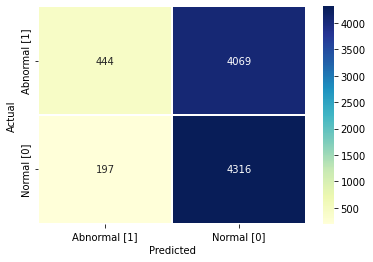

In [ ]:
# test 평가
frr, far, f1 = calculate_metric(Y_test, ae1_scores['anomaly'].iloc[len(train_mse1):])

print("**  FRR: {}  |  FAR: {}  |  F1 Score: {}".format(round(frr, 4), round(far, 4), round(f1, 4)))

**  FRR: 0.05  |  FAR: nan  |  F1 Score: 0.0


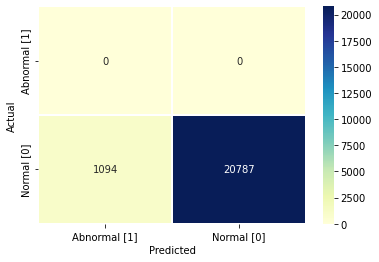

In [ ]:
# train 평가
frr, far, f1 = calculate_metric(Y_train, ae1_scores['anomaly'].iloc[:len(train_mse1)])

print("**  FRR: {}  |  FAR: {}  |  F1 Score: {}".format(round(frr, 4), round(far, 4), round(f1, 4)))

# AutoEncoder2

In [ ]:
import tensorflow as tf

## train 기반 모델 적합

In [ ]:
input_dim = X_train.shape[1]

AE = tf.keras.models.Sequential([
    
    # encode
    tf.keras.layers.Dense(input_dim, activation='elu', input_shape=(input_dim, )), 
    tf.keras.layers.Dense(15, activation='elu'),
    tf.keras.layers.Dense(5, activation='elu'),
    
    # decode
    tf.keras.layers.Dense(15, activation='elu'),
    tf.keras.layers.Dense(input_dim, activation='elu')
    
])

AE.compile(optimizer="adam", loss="mse")
AE.summary();

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                420       
                                                                 
 dense_1 (Dense)             (None, 15)                315       
                                                                 
 dense_2 (Dense)             (None, 5)                 80        
                                                                 
 dense_3 (Dense)             (None, 15)                90        
                                                                 
 dense_4 (Dense)             (None, 20)                320       
                                                                 
Total params: 1,225
Trainable params: 1,225
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = AE.fit(
    X_train,
    X_train,
    epochs=100,
    batch_size=32,
    validation_split=0.3
)

Epoch 1/100
479/479 [==============================] - 2s 3ms/step - loss: 1.0261 - val_loss: 0.2067
Epoch 2/100
479/479 [==============================] - 1s 3ms/step - loss: 0.1450 - val_loss: 0.1142
Epoch 3/100
479/479 [==============================] - 1s 3ms/step - loss: 0.1034 - val_loss: 0.0980
Epoch 4/100
479/479 [==============================] - 1s 3ms/step - loss: 0.0919 - val_loss: 0.0907
Epoch 5/100
479/479 [==============================] - 1s 3ms/step - loss: 0.0864 - val_loss: 0.0860
Epoch 6/100
479/479 [==============================] - 1s 3ms/step - loss: 0.0833 - val_loss: 0.0839
Epoch 7/100
479/479 [==============================] - 1s 3ms/step - loss: 0.0813 - val_loss: 0.0806
Epoch 8/100
479/479 [==============================] - 1s 3ms/step - loss: 0.0797 - val_loss: 0.0799
Epoch 9/100
479/479 [==============================] - 1s 3ms/step - loss: 0.0784 - val_loss: 0.0782
Epoch 10/100
479/479 [==============================] - 1s 3ms/step - loss: 0.0777 - val_lo

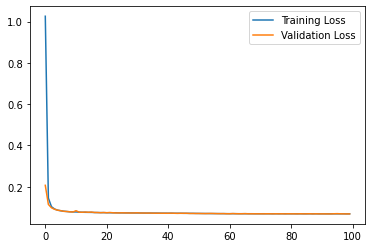

In [ ]:
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.legend()
plt.show()

In [ ]:
# train data에 대한 예측 값
AE_train_pred = AE.predict(X_train)

# 실제 값과 예측 값 사이의 차이인 MSE값을 reconstruction error로 정의 -> Novelty Score
train_mse = np.mean(np.power(X_train - AE_train_pred, 2), axis=1)
train_mse_df = pd.DataFrame({'Reconstruction_error': train_mse})
train_mse

684/684 [==============================] - 1s 1ms/step


4513     0.025464
4514     0.038665
4515     0.020033
4516     0.077791
4517     0.078775
           ...   
26389    0.039846
26390    0.051276
26391    0.117681
26392    0.043141
26393    0.076723
Length: 21881, dtype: float64

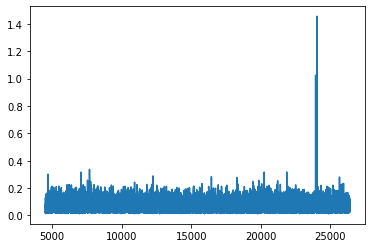

In [ ]:
plt.plot(train_mse)

## threshold

In [ ]:
# train 데이터에 대한 novelty score 기준 상위 15% 의 값을 임계치로 설정
AE_thresh = np.percentile(sorted(train_mse_df['Reconstruction_error']), 70)
AE_thresh

0.08219586899277578

In [ ]:
# test data에 대한 예측 값
AE_test_pred = AE.predict(X_test)

# 실제 값과 예측 값 사이의 차이인 MSE값을 reconstruction error로 정의
test_mse = np.mean(np.power(X_test - AE_test_pred, 2), axis=1)
test_mse_df = pd.DataFrame({'Reconstruction_error': test_mse})
test_mse

283/283 [==============================] - 0s 1ms/step


0        0.065480
1        0.044829
2        0.034531
3        0.171601
4        0.141001
           ...   
30902    0.098473
30903    0.077433
30904    0.043568
30905    0.105140
30906    0.122762
Length: 9026, dtype: float64

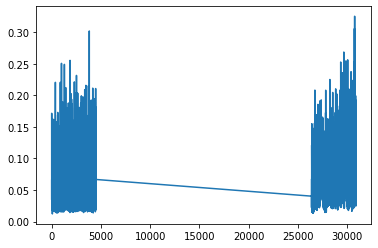

In [ ]:
plt.plot(test_mse)

In [ ]:
# classifier
# AE_thresh 기준, test_mse 값이 더 크면 이상(1), 작으면 정상(0)으로 분류
AE_test_df = []

def novelty_classifier(novelty_score):
    for i in range(len(novelty_score)):
        if novelty_score[i] > AE_thresh:
            AE_test_df.append(1)
        else:
            AE_test_df.append(0)

In [ ]:
novelty_classifier(test_mse.values)

**  FRR: 0.3009  |  FAR: 0.6085  |  F1 Score: 0.4627


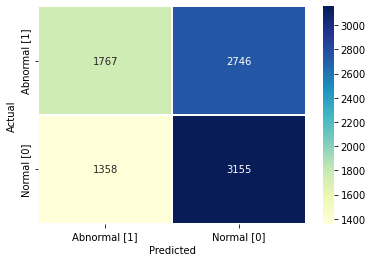

In [ ]:
# test 평가
frr, far, f1 = calculate_metric(Y_test, AE_test_df)

print("**  FRR: {}  |  FAR: {}  |  F1 Score: {}".format(round(frr, 4), round(far, 4), round(f1, 4)))

In [ ]:
ae2_scores = pd.DataFrame()
ae2_scores['score'] = list(np.hstack([train_mse, test_mse]))
ae2_scores['anomaly'] = AE_thresh < ae2_scores['score'] #true 값일 거고 threshold > score 이면 false
ae2_scores['anomaly'] = ae2_scores['anomaly'].replace({True: 1, False: 0})
ae2_scores

,score,anomaly
0,0.025464,0
1,0.038665,0
2,0.020033,0
3,0.077791,0
4,0.078775,0
...,...,...
30902,0.098473,1
30903,0.077433,0
30904,0.043568,0
30905,0.105140,1


**  FRR: 0.3009  |  FAR: 0.6085  |  F1 Score: 0.4627


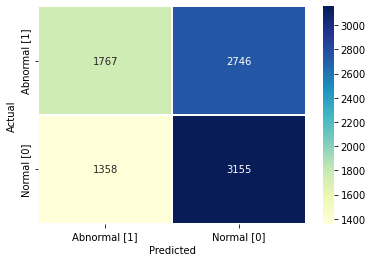

In [ ]:
# test 평가
frr, far, f1 = calculate_metric(Y_test, ae2_scores['anomaly'].iloc[len(train_mse):])

print("**  FRR: {}  |  FAR: {}  |  F1 Score: {}".format(round(frr, 4), round(far, 4), round(f1, 4)))

'이상'인데 '정상'으로 보는 FAR이 높다